Gráfico de barras do número de postos por região/estado por ano em uma grid.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.ticker as ticker
import re

In [2]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

dataset_path = '/content/gdrive/MyDrive/gas.csv'

Mounted at /content/gdrive


In [3]:
df = pd.read_csv(dataset_path)
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [4]:
df.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [5]:
df['REGIÃO'].value_counts()

NORDESTE        41671
NORTE           27989
SUDESTE         19270
CENTRO OESTE    17449
SUL             14444
Name: REGIÃO, dtype: int64

In [6]:
df['ESTADO'].value_counts()

PARAIBA                4819
RIO DE JANEIRO         4819
SAO PAULO              4819
RIO GRANDE DO SUL      4819
BAHIA                  4819
SANTA CATARINA         4818
RIO GRANDE DO NORTE    4818
MINAS GERAIS           4817
ESPIRITO SANTO         4815
PERNAMBUCO             4813
CEARA                  4813
PARANA                 4807
ALAGOAS                4806
SERGIPE                4795
MATO GROSSO DO SUL     4793
MATO GROSSO            4566
AMAZONAS               4414
GOIAS                  4134
PIAUI                  4017
MARANHAO               3971
DISTRITO FEDERAL       3956
PARA                   3955
TOCANTINS              3953
RONDONIA               3950
ACRE                   3948
RORAIMA                3938
AMAPA                  3831
Name: ESTADO, dtype: int64

In [7]:
df['DATA FINAL'].value_counts()

2021-03-13    180
2021-03-06    180
2021-04-17    179
2021-04-10    179
2021-03-20    179
             ... 
2008-08-30    122
2005-09-10    122
2005-09-03    122
2009-09-05    121
2005-10-08    119
Name: DATA FINAL, Length: 873, dtype: int64

In [8]:
df.shape

(120823, 18)

In [9]:
df.isna().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [20]:
#df['DATA FINAL'] = pd. to_datetime(df['DATA FINAL'],format='%Y-%m-%d')
#df['ANO'] = pd. DatetimeIndex(df['DATA FINAL']).year
#df['ANO'].value_counts()

df['ANO'] = list(map(lambda x: x[0:4], df['DATA FINAL']))
df['ANO'].value_counts()

2016    8026
2014    7932
2013    7912
2017    7839
2018    7826
2019    7810
2015    7771
2020    6898
2011    6611
2012    6490
2010    6489
2006    6474
2007    6474
2008    6454
2005    6310
2009    6232
2004    4081
2021    3194
Name: ANO, dtype: int64

[(0.0, 1200.0), Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, '2021')]

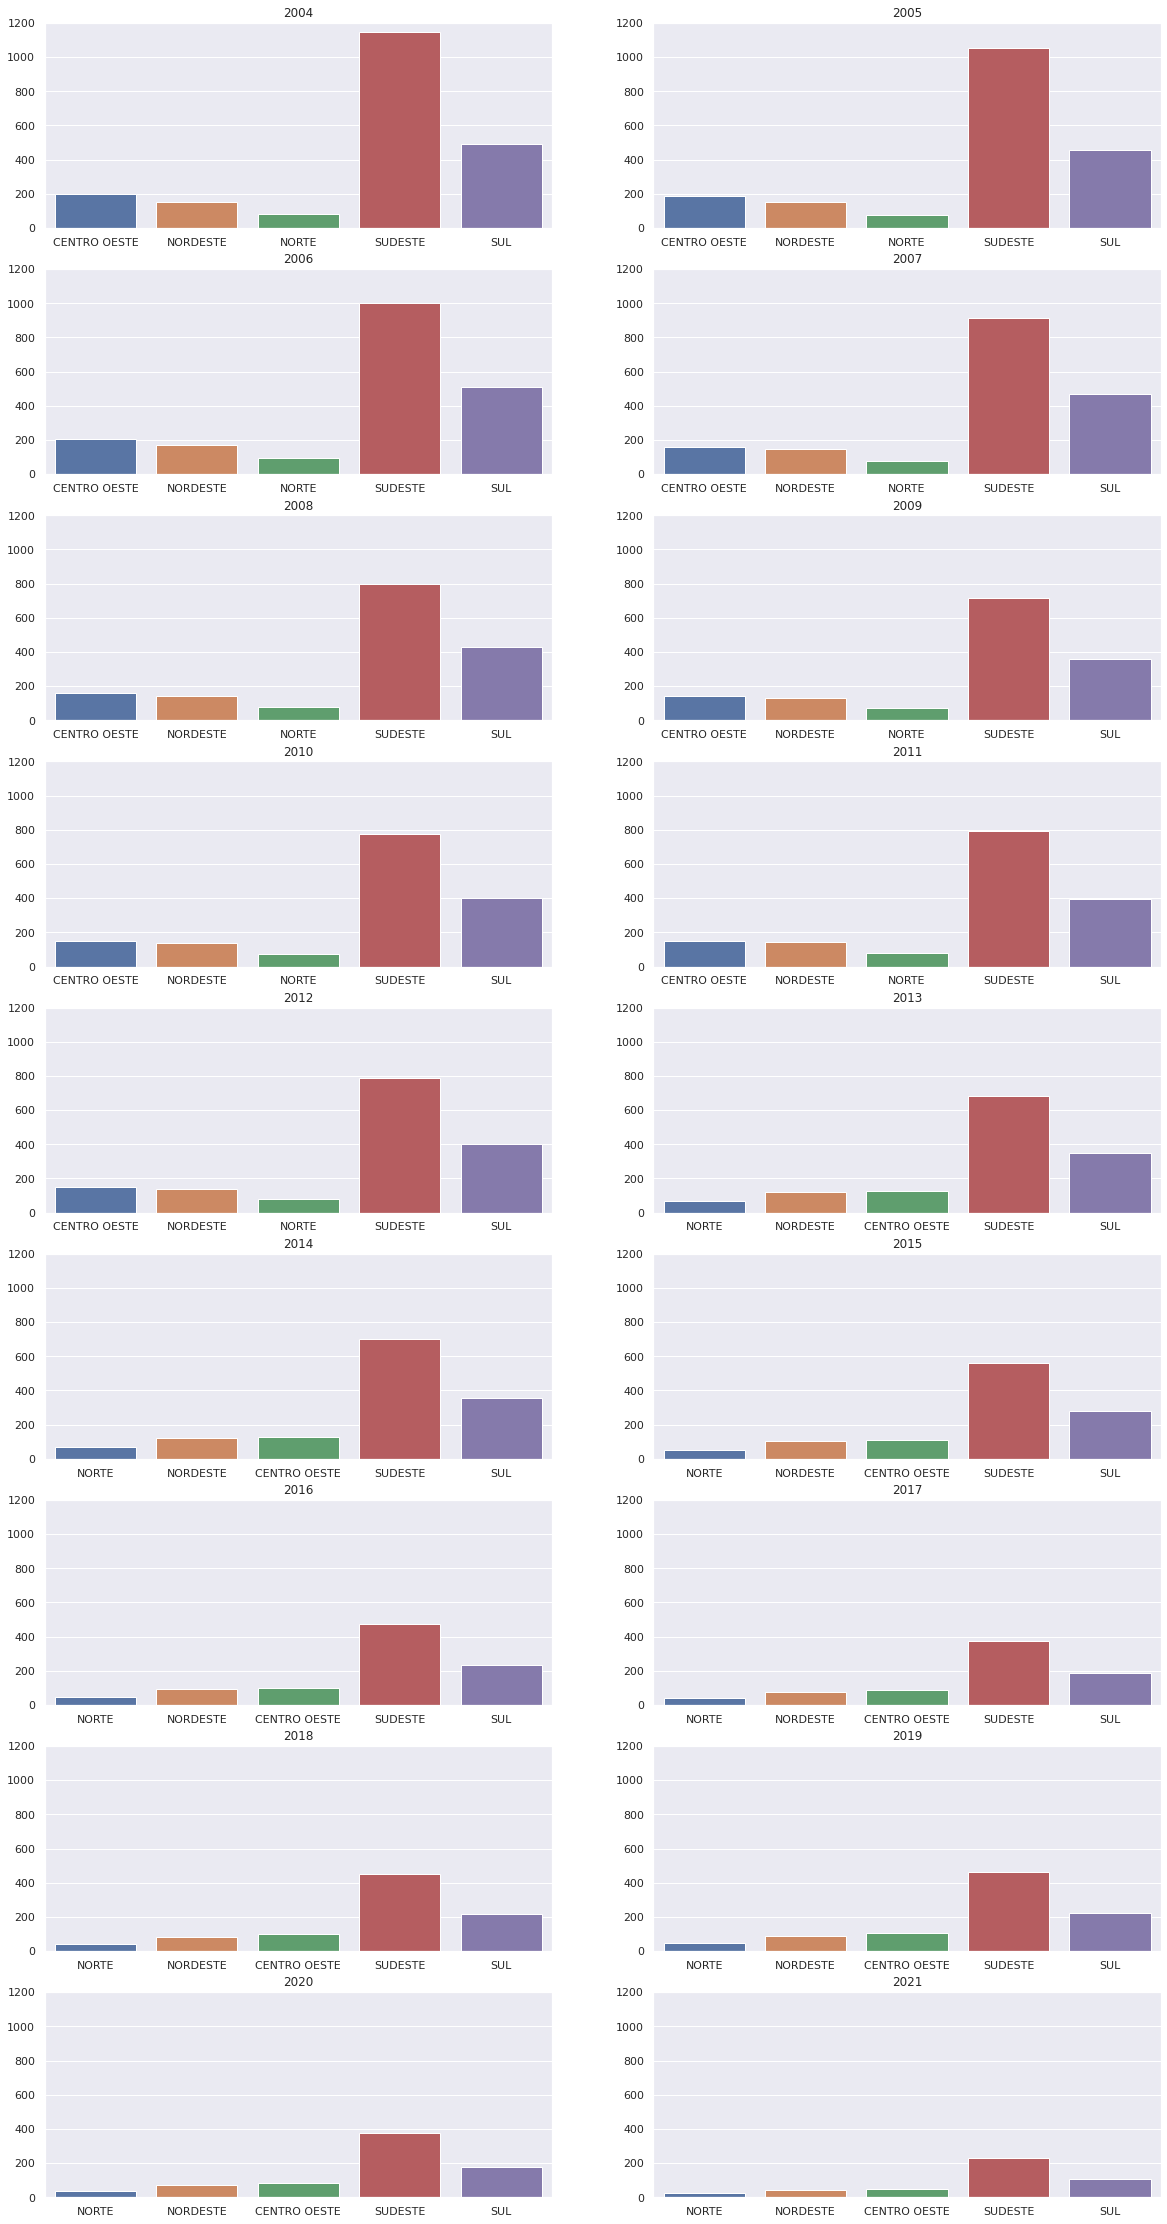

In [19]:
sns.set()
fig, ax = plt.subplots(9, 2,figsize=(20,40))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2004'],ax=ax[0,0],ci=None).set(xlabel=None,ylabel=None,title='2004',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2005'],ax=ax[0,1],ci=None).set(xlabel=None,ylabel=None,title='2005',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2006'],ax=ax[1,0],ci=None).set(xlabel=None,ylabel=None,title='2006',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2007'],ax=ax[1,1],ci=None).set(xlabel=None,ylabel=None,title='2007',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2008'],ax=ax[2,0],ci=None).set(xlabel=None,ylabel=None,title='2008',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2009'],ax=ax[2,1],ci=None).set(xlabel=None,ylabel=None,title='2009',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2010'],ax=ax[3,0],ci=None).set(xlabel=None,ylabel=None,title='2010',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2011'],ax=ax[3,1],ci=None).set(xlabel=None,ylabel=None,title='2011',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2012'],ax=ax[4,0],ci=None).set(xlabel=None,ylabel=None,title='2012',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2013'],ax=ax[4,1],ci=None).set(xlabel=None,ylabel=None,title='2013',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2014'],ax=ax[5,0],ci=None).set(xlabel=None,ylabel=None,title='2014',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2015'],ax=ax[5,1],ci=None).set(xlabel=None,ylabel=None,title='2015',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2016'],ax=ax[6,0],ci=None).set(xlabel=None,ylabel=None,title='2016',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2017'],ax=ax[6,1],ci=None).set(xlabel=None,ylabel=None,title='2017',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2018'],ax=ax[7,0],ci=None).set(xlabel=None,ylabel=None,title='2018',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2019'],ax=ax[7,1],ci=None).set(xlabel=None,ylabel=None,title='2019',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2020'],ax=ax[8,0],ci=None).set(xlabel=None,ylabel=None,title='2020',ylim=(0, 1200))

sns.barplot(x="REGIÃO",y="NÚMERO DE POSTOS PESQUISADOS",data=df[df['ANO']=='2021'],ax=ax[8,1],ci=None).set(xlabel=None,ylabel=None,title='2021',ylim=(0, 1200))